In [1]:
#Main libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':[8,8]},font_scale = 1.2)

In [2]:
#Preprocessing
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [4]:
#Evaluating algorithms
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

In [5]:
#Hyperparameters tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
#For data inspection
def check_value_counts(columns):
    '''
    This function for checking the value counts in the given columns.
    INPUT:
    columns:list. A list of columns names in the data set.
    OUTPUT:
    The value counts for the given columns.
    '''
    global df
    for col in columns:
        print(col)
        print(df[col].value_counts()[:5])
        print('-'*30)

#For EDA
def kdplot(feature):
    '''
    This function for plotting the kdeplot shape for people
    with heart disease based on a feature.
    INPUT:
    feature: str. The feature name.
    OUTPUT:
    A kdeplot.
    '''
    global df
    x = df[df['HeartDisease'] == 1][feature]
    sns.kdeplot(x,shade=True)
    plt.title(
        'The '+feature+
        ' Distribution For People With Heart Disease.',
         c = 'red'
             )
    plt.xlabel(feature,c = 'red')
    plt.ylabel('The Density',c = 'red')
    plt.show()

def cntplt(feature):
    '''
    This function for showing the counts of observations in each categorical value
    for people with heart disease.
    INPUT:
    feature: str. The feature name.
    OUTPUT:
    Countplot shape.
    '''
    global df
    x = df[df['HeartDisease'] == 1][feature]
    sns.countplot(x,facecolor = (0,0,0,0),linewidth = 3,edgecolor = sns.color_palette('dark',3))
    plt.xlabel(feature,c='red')
    plt.ylabel('Count',c = 'red')
    plt.xticks(rotation = 30)
    plt.title(feature+' For People With Heart Disease',c = 'red')
    plt.show()

#For preprocessing
def get_numerical_data(target):
    '''
    This function for obtaining the numerical features.
    INPUT:
    target: str. The label name.
    OUTPUT:
     A list of numerical features.
    '''
    global df
    num_data = []
    for feature in df.columns:
        if is_numeric_dtype(df[feature]) and feature != target:
            num_data.append(feature)
    return num_data

def data_limits(feature,alpha):
    '''
    This function for detecting the feature limits.
    INPUT:
    feature: str. The feature name.
    alpha: int or float. A number for tuning the threshold.
    OUTPUT:
    Returning the lower bound and the upper bound. 
    '''
    global df
    Q3,Q1 = np.percentile(df.loc[:,feature],[75,25])
    IQR = Q3 - Q1
    LowerBound = Q1 - (alpha * IQR)
    UpperBound = Q3 + (alpha * IQR)
    return LowerBound,UpperBound

def outliers_cnts(features,alpha):
    '''
    This function for detecting the outliers in the given features.
    INPUT:
    features: list. A list of features.
    alpha: int or float. A number for tuning the threshold.
    OUTPUT:
    Number of outliers in each feature. 
    '''
    global df
    for feature in features:
        LowBound, UpBound = data_limits(feature,alpha)
        outl_cnts = len(df[(df[feature]> UpBound) | (df[feature]<LowBound)])
        print(f'No.of outliers in {feature} = {outl_cnts}')

def outliers_indices(feature,alpha):
    '''
    This function for detecting the outliers indices in the given feature.
    INPUT:
    feature: str. The feature name.
    alpha: int or float. A number for tuning the threshold.
    OUTPUT:
    Outliers indices.
    '''
    global df
    LowBound, UpBound = data_limits(feature,alpha)
    outliers = [val for val in df[feature] if val > UpBound or val < LowBound]
    outliers_indices = [idx for idx,val in enumerate(df[feature]) if val in outliers]
    return outliers_indices
#For evaluating ML algorithms
def performance(y_train_pred,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    y_train_pred: numpy.ndarray. The predicted training data.
    y_train: pandas.core.series.Series. The actual training data.
    y_pred: numpy.ndarray. The predicted testing data.
    y_test: pandas.core.series.Series. The actual testing data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',accuracy_score(y_train,y_train_pred))
    print('Testing Score:',accuracy_score(y_test,y_pred))
    print('Confusion Matrix In Testing Data: ')
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',linecolor='k',linewidths=1,fmt = 'd')
    plt.title('The Confusion Matrix',color='red')
    plt.xlabel('Predicted',color='red')
    plt.ylabel('Actual',color='red')
    plt.show() 

def cross_val(model,x,cv = 10):
    '''
    This function for applying cross validation and return  it's performance.
    INPUT:
    model: A ML model.
    x: numpy.ndarray. The features.
    cv: int. The cross validation splitting strategy.
    OUTPUT:
    The cross validation performance.
    ''' 
    global y
    cv_res = cross_validate(estimator=model,X=x,y=y,n_jobs=-1,cv=cv,return_train_score = True)
    y_pred = cross_val_predict(estimator=model,X=x,y=y,n_jobs=-1,cv=cv)
    print('Training Score:',cv_res['train_score'].mean())
    print('Testing Score:',accuracy_score(y,y_pred))
    print('Confusion Matrix By using Y_Actual and Y_Predicted: ')
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='Blues',linecolor='k',linewidths=1,fmt = 'd')
    plt.title('The Confusion Matrix',color='red')
    plt.xlabel('Predicted',color='red')
    plt.ylabel('Actual',color='red')
    plt.show() 

In [7]:
df = pd.read_csv('heart.csv')

In [8]:
#The first five rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
#The shape of the data
df.shape

(918, 12)

In [10]:
#The data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
#Check duplicated data
df.duplicated().sum()

0

In [12]:
#Taking an overview about these columns 
cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
check_value_counts(cols)

Sex
M    725
F    193
Name: Sex, dtype: int64
------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------
FastingBS
0    704
1    214
Name: FastingBS, dtype: int64
------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------
HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64
------------------------------


In [13]:
#Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


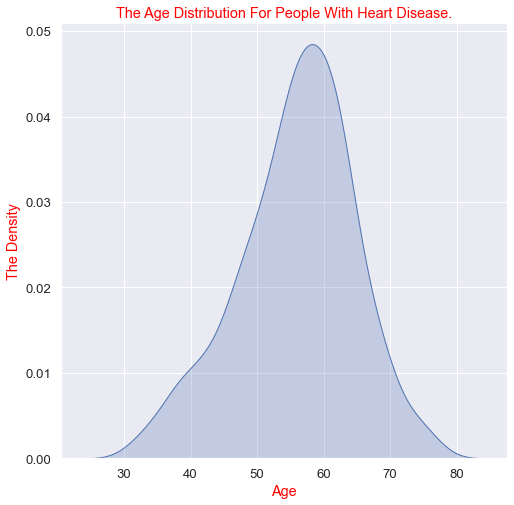

In [14]:
kdplot('Age')

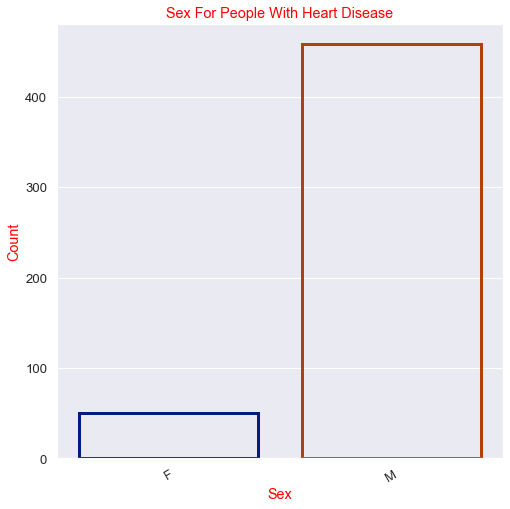

In [15]:
cntplt('Sex')

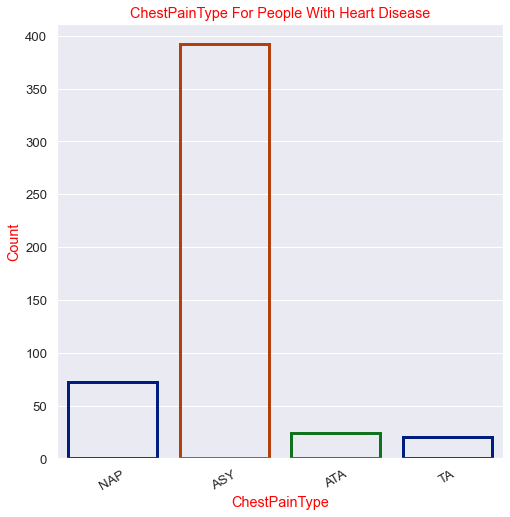

In [16]:
cntplt('ChestPainType')

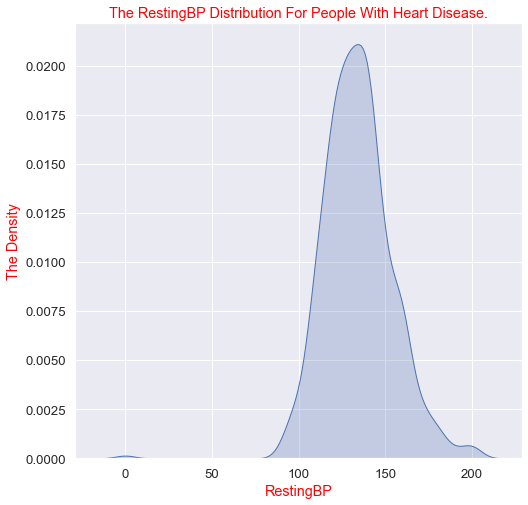

In [17]:
kdplot('RestingBP')

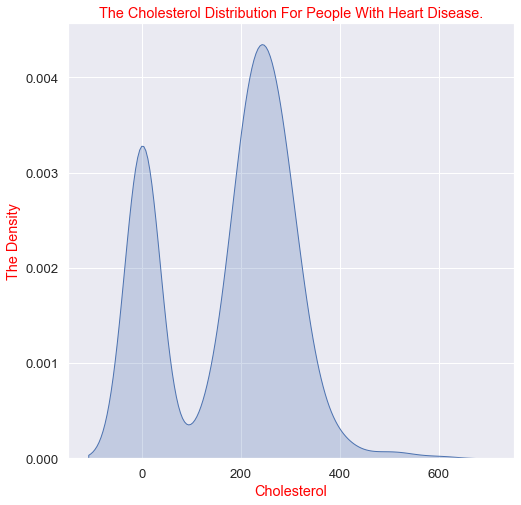

In [18]:
kdplot('Cholesterol')

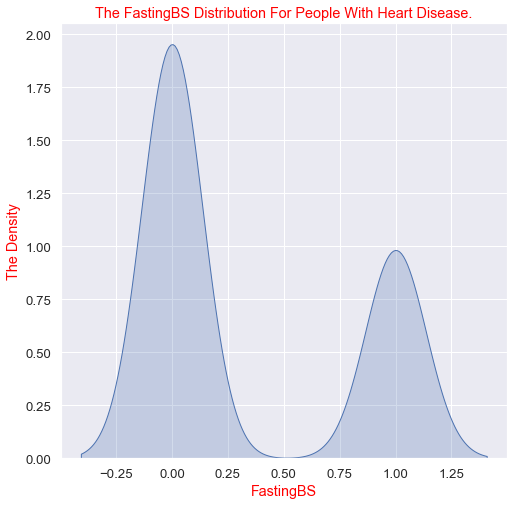

In [19]:
kdplot('FastingBS')

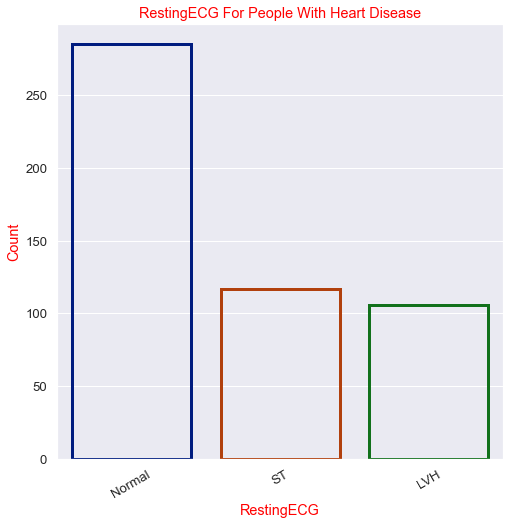

In [20]:
cntplt('RestingECG')

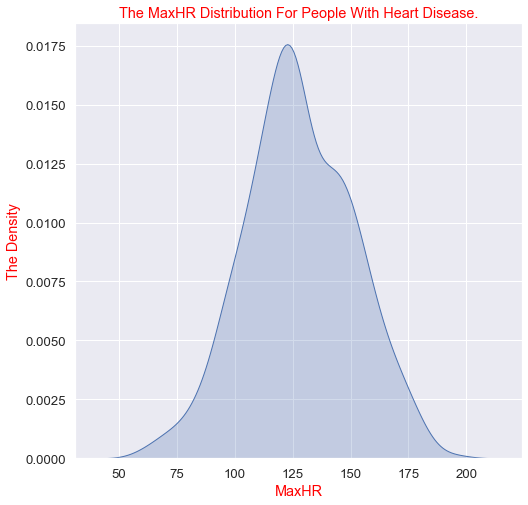

In [21]:
kdplot('MaxHR')

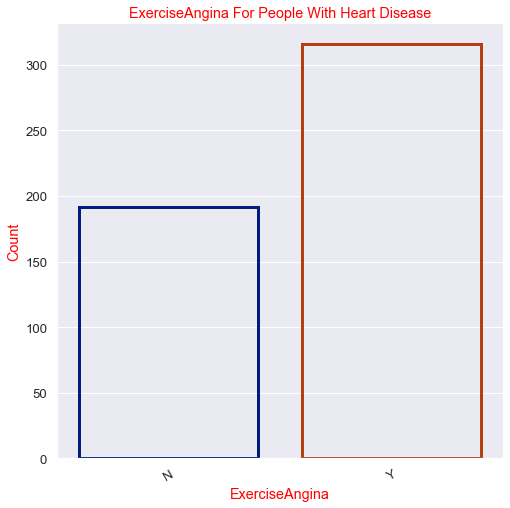

In [22]:
cntplt('ExerciseAngina')

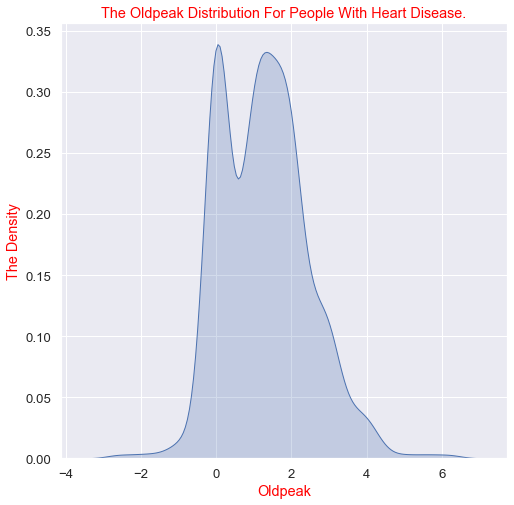

In [23]:
kdplot('Oldpeak')

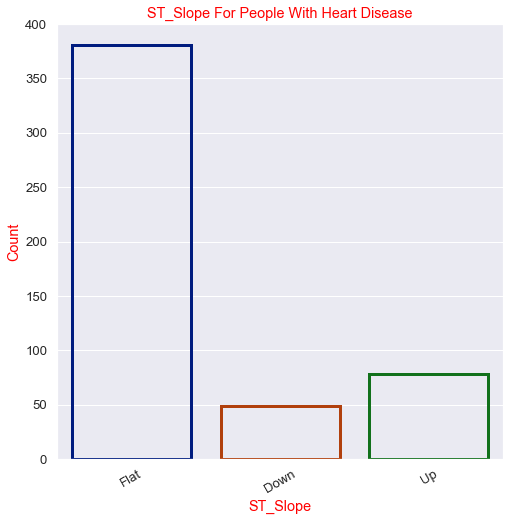

In [24]:
cntplt('ST_Slope')

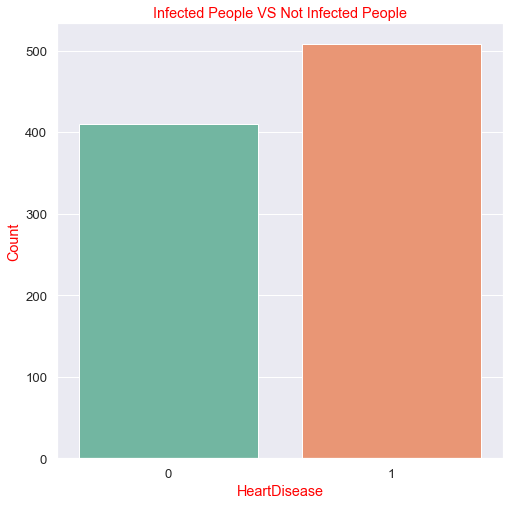

In [25]:
#The target
sns.countplot(df['HeartDisease'],palette='Set2')
plt.xlabel('HeartDisease',color = 'red')
plt.ylabel('Count',color = 'red')
plt.title('Infected People VS Not Infected People',color = 'red')
plt.show()

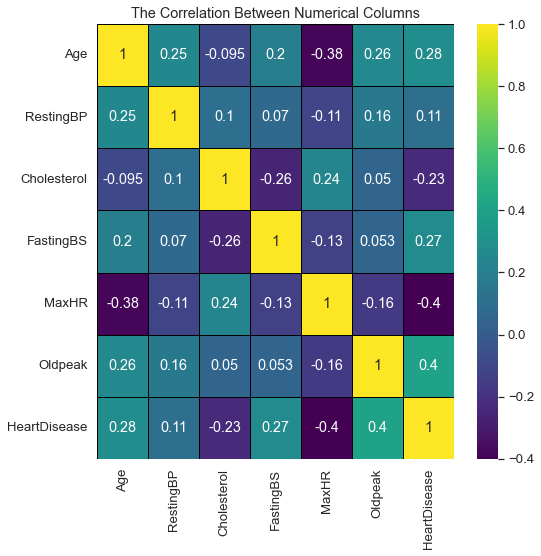

In [26]:
sns.heatmap(df.corr(),annot = True,linewidth = 1,linecolor = 'black',cmap = 'viridis')
plt.title('The Correlation Between Numerical Columns')
plt.show()

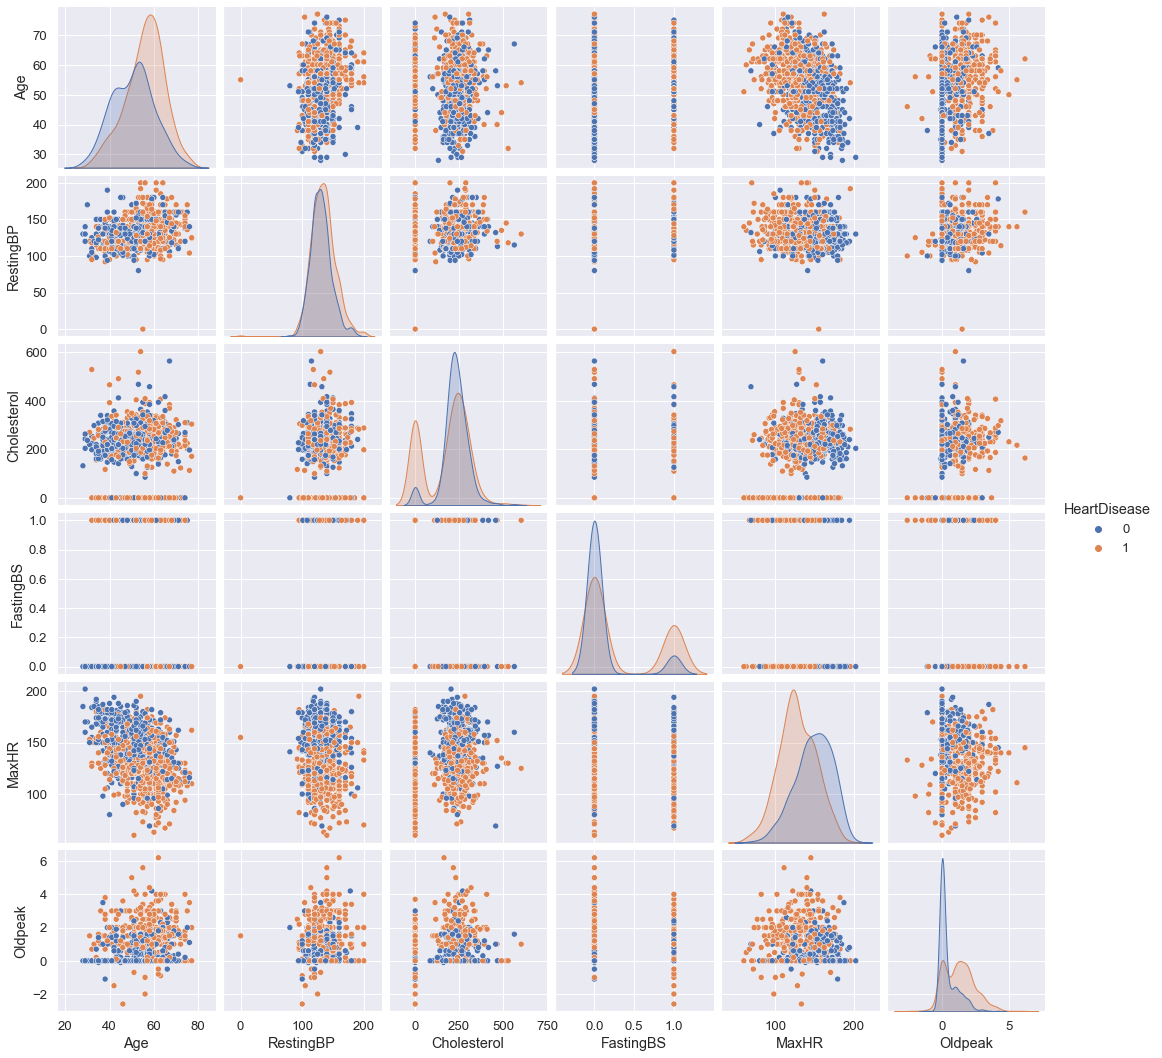

In [27]:
#PairPlot
sns.pairplot(df,hue = 'HeartDisease');

In [28]:
#Get numerical features
num_feature = get_numerical_data('HeartDisease')
#Number of outliers in numerical data
outliers_cnts(num_feature,1.5)

No.of outliers in Age = 0
No.of outliers in RestingBP = 28
No.of outliers in Cholesterol = 183
No.of outliers in FastingBS = 214
No.of outliers in MaxHR = 2
No.of outliers in Oldpeak = 16


In [29]:
#Taking a copy from the data
df_new = df.copy()

#Removing the outliers in RestingBP 
indices = outliers_indices('RestingBP',1.5)
df_new.drop(indices,axis = 0,inplace = True)


In [30]:
#Converting categorical features to numerical features
df_new = pd.get_dummies(df_new,drop_first=True)

#Splitting the data to x and y
x = df_new.drop('HeartDisease',axis = 1)
y = df_new['HeartDisease']

#Scaling the data
scaler = StandardScaler()
scaler.fit(x)
x_new = scaler.transform(x)

#Splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state=0,shuffle=True)

#The training info
print('X_Train Shape',x_train.shape)
print('Y_Train Shape',y_train.shape)
print('X_Test Shape',x_test.shape)
print('Y_Test Shape',y_test.shape)

X_Train Shape (712, 15)
Y_Train Shape (712,)
X_Test Shape (178, 15)
Y_Test Shape (178,)


In [31]:
#The final data set
pd.set_option('display.max_columns',None)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


Training Score: 0.8721910112359551
Testing Score: 0.898876404494382
Confusion Matrix In Testing Data: 


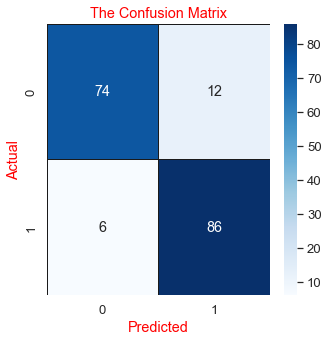

In [32]:
#Fitting the model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

#The predicted data
lr_ytrain_pred = log_reg.predict(x_train)
lr_ytest_pred = log_reg.predict(x_test)

#The performance
performance(lr_ytrain_pred,y_train,lr_ytest_pred,y_test,)

Training Score: 0.8754057428214732
Testing Score: 0.852808988764045
Confusion Matrix By using Y_Actual and Y_Predicted: 


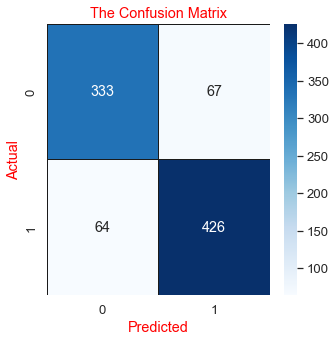

In [33]:
#Applying cross validation with it's performance
cross_val(LogisticRegression(),x_new)

Training Score: 1.0
Testing Score: 0.8820224719101124
Confusion Matrix In Testing Data: 


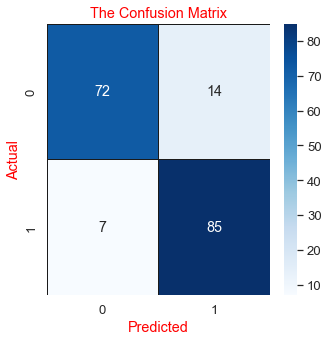

In [34]:
#Fitting the model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

#The predicted data
rf_ytrain_pred = rf.predict(x_train)
rf_ytest_pred = rf.predict(x_test)

#The performance
performance(rf_ytrain_pred,y_train,rf_ytest_pred,y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Score: 0.8805968679208116
Training Score: 0.9241573033707865
Testing Score: 0.8876404494382022
Confusion Matrix In Testing Data: 


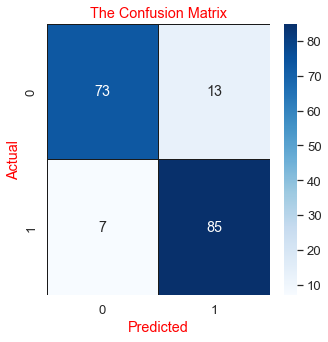

In [35]:
#Tuning the model
params = {'n_estimators':[100,150,200,250,300],'max_depth':[3,5,8,12],
          'criterion':["gini", "entropy"],'min_samples_split':[2,3,4],
          'min_samples_leaf':[2,3],'random_state':[0],'oob_score':[True]
         }
gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
print('Best Score:',gs.best_score_)

#Applying the new model
rf = gs.best_estimator_
rf.fit(x_train,y_train)

#The predicted data
rf_gs_ytrain_pred = rf.predict(x_train)
rf_gs_ytest_pred = rf.predict(x_test)

#The performance
performance(rf_gs_ytrain_pred,y_train,rf_gs_ytest_pred,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'base_estimator': DecisionTreeClassifier(max_depth=4), 'learning_rate': 0.015, 'n_estimators': 200, 'random_state': 1}
Training Score: 0.9634831460674157
Testing Score: 0.9157303370786517
Confusion Matrix In Testing Data: 


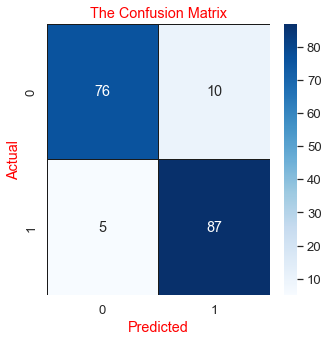

In [36]:
#Tuning the model 
params = {'n_estimators':[200,300],'learning_rate':[0.014,0.015,0.02],
          'random_state':[1], 'base_estimator': [
                               DecisionTreeClassifier(criterion='gini', max_depth=4)
                                                ]
         }
gs = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params,n_jobs=-1,verbose=1)

#Fitting gradient search
gs.fit(x_train,y_train)

#The best parameters
print('Best Parameters:',gs.best_params_)

#Using the best estimator
adaboost = gs.best_estimator_

#Fiiting the mode
adaboost.fit(x_train,y_train)

#The predicted data
ada_ytrain_pred = adaboost.predict(x_train)
ada_ytest_pred = adaboost.predict(x_test)

#The model performance
performance(ada_ytrain_pred,y_train,ada_ytest_pred,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 1}
Training Score: 0.9831460674157303
Testing Score: 0.9213483146067416
Confusion Matrix In Testing Data: 


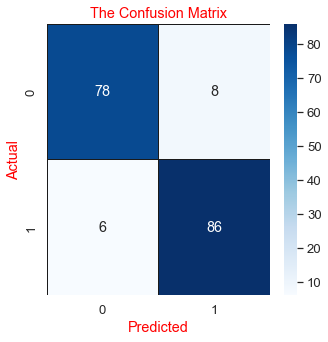

In [37]:
#Tuning the model
params = {
            'n_estimators':[200],'max_depth':[3,4,5],'learning_rate':[0.1,0.001],
            'random_state':[1]
         }
gs = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=params,n_jobs=-1,verbose=1)

#Fitting the grid search
gs.fit(x_train,y_train)

#Best parameters
print('Best Parameters:',gs.best_params_)

#Fitting gboost model
gboost = gs.best_estimator_
gboost.fit(x_train,y_train)

#The predicted data
gb_ytrain_pred = gboost.predict(x_train)
gb_ytest_pred = gboost.predict(x_test)

#The model performance
performance(gb_ytrain_pred,y_train,gb_ytest_pred,y_test)

In [38]:
#The current score
print('Precision Score:',precision_score(y_test,gb_ytest_pred))
print('Recall Score:',recall_score(y_test,gb_ytest_pred))

Precision Score: 0.9148936170212766
Recall Score: 0.9347826086956522


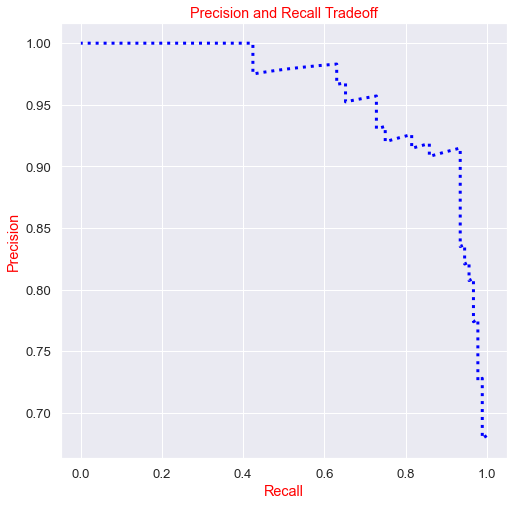

In [39]:
#Get y scores
y_scores = gboost.decision_function(x_test)

#Get precision, recall, and threshold values
pre_vals,rec_vals,threshold_vals = precision_recall_curve(y_test,y_scores)

#Precision and recall tradeoff
plt.plot(rec_vals,pre_vals,linewidth = 3,linestyle = ':',color = 'blue')
plt.title('Precision and Recall Tradeoff',color = 'red')
plt.xlabel('Recall',color = 'red')
plt.ylabel('Precision',color = 'red')
plt.show()

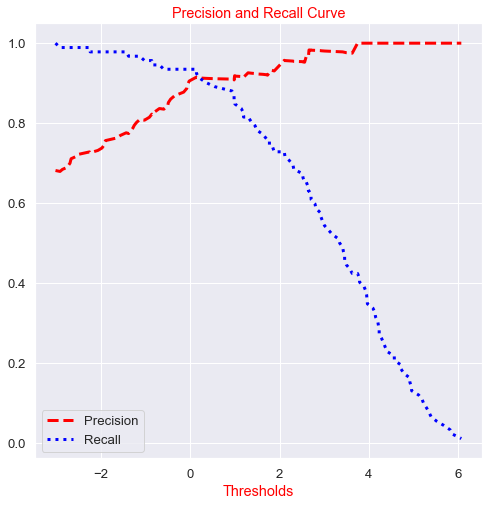

In [40]:
#Precision and recall curve
plt.plot(threshold_vals,pre_vals[:-1],color = 'red',linestyle = '--',label = 'Precision',linewidth = 3)
plt.plot(threshold_vals,rec_vals[:-1],color = 'blue',linestyle = ':',label = 'Recall',linewidth = 3)
plt.xlabel('Thresholds',color = 'red')
plt.title('Precision and Recall Curve',color = 'red')
plt.legend()
plt.show()

In [41]:
#Tuning the recall to be greater than or equal to 98
threshold_rec = threshold_vals[np.argmax(rec_vals >= 0.98)]
new_ypred = (y_scores >= threshold_rec)
print(f'Threshold Value: {threshold_rec:.5f}')
print(f'Precision Score: {precision_score(y_test,new_ypred):.3f}')
print(f'Recall Score: {recall_score(y_test,new_ypred):.3f}')

Threshold Value: -3.02741
Precision Score: 0.681
Recall Score: 1.000


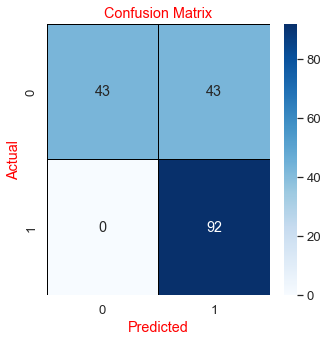

In [42]:
#Confusion matrix for the new prediction
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,new_ypred),cmap = 'Blues',linewidths=1,linecolor='black',annot = True)
plt.xlabel('Predicted',color = 'red')
plt.ylabel('Actual',color = 'red')
plt.title('Confusion Matrix',color = 'red')
plt.show()

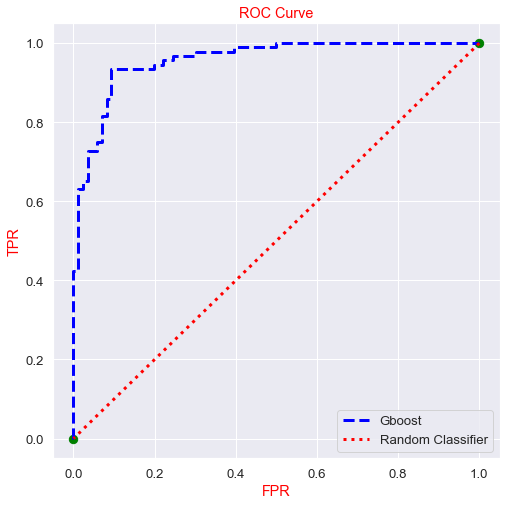

In [43]:
#Get fpr,tpr and threshold values
fpr_vals,tpr_vals,thrshld_vals = roc_curve(y_test,y_scores)

#The roc curve
plt.plot(fpr_vals,tpr_vals,color = 'blue',linestyle = '--',linewidth = 3,label = 'Gboost')
plt.plot([1,0],[1,0],color= 'red',linewidth = 3,linestyle = ':',label = 'Random Classifier')
plt.scatter(0,0,color = 'green',s =70)
plt.scatter(1,1,color = 'green',s = 70)
plt.xlabel('FPR',color = 'red')
plt.ylabel('TPR',color = 'red')
plt.title('ROC Curve',color = 'red')
plt.legend()
plt.show()

In [44]:
#AUC
auc_score = roc_auc_score(y_test,y_scores)
print('AUC:',auc_score)

AUC: 0.9577856420626896


In [45]:
accuracy = {
    'Logistic Regression': accuracy_score(y_test, lr_ytest_pred),
    'RandomForest Classifier': accuracy_score(y_test, rf_ytest_pred),
    'GridSearchCV with RandomForest': accuracy_score(y_test, rf_gs_ytest_pred),
    'GridSearchCV with Ada Boost': accuracy_score(y_test, ada_ytest_pred),
    'GridSearchCV with Gradient Boosting': accuracy_score(y_test, gb_ytest_pred)
}

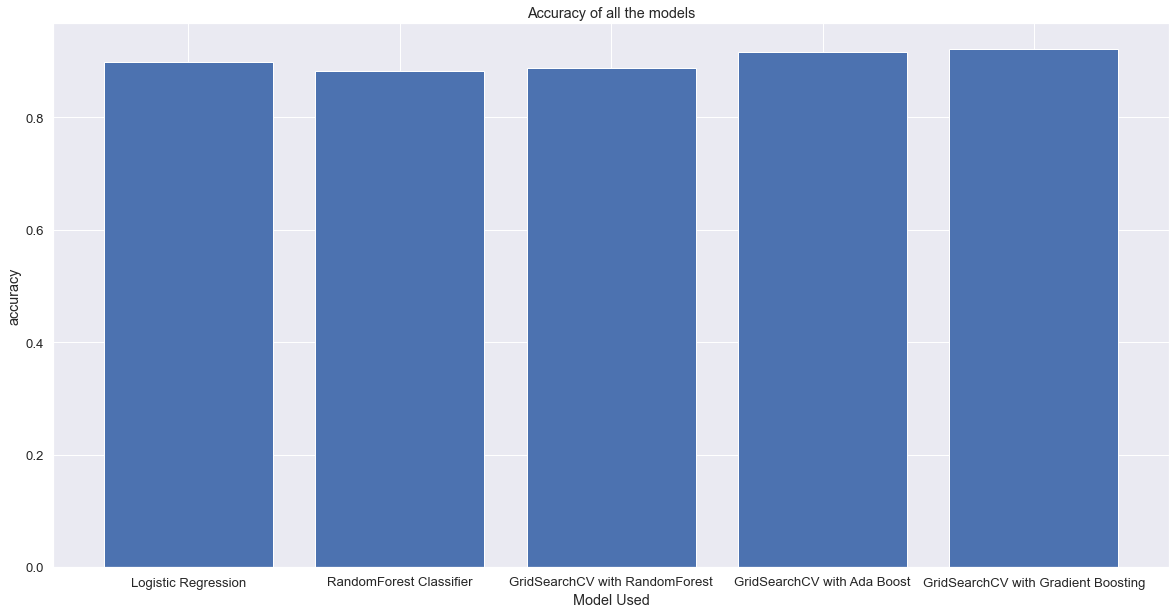

In [46]:
plt.figure(figsize = (20, 10))
plt.bar(accuracy.keys(), accuracy.values())
plt.xlabel("Model Used")
plt.ylabel("accuracy")
plt.title("Accuracy of all the models")
plt.show()